# Práctica de ML

Este es mi notebook relacionado con el ejercicio desarrollado en el curso de Udemy "Python Total".

In [1]:
# Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree

In [2]:
# Cargar archivo - Metodo google drive
from google.colab import drive
drive.mount('/content/drive')
datos = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data_Set_Titanic.csv")

Mounted at /content/drive


In [3]:
# Cargar archivo - Metodo pc
# from google.colab import files
# uploaded = files.upload()
# datos = pd.read_csv("Data_Set_Titanic.csv")

In [4]:
# Verificar los datos de los archivos
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Verificar las estadisticas de los datos
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

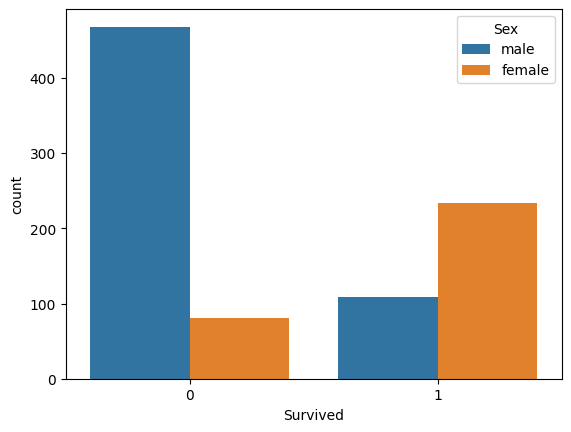

In [6]:
# Verificar el impacto de algun dato
sns.countplot(x="Survived", data=datos, hue="Sex")

In [7]:
# Verificar datos vacios
datos.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
# Rellenar datos vacios con el promedio
datos["Age"].mean()
datos["Age"] = datos["Age"].fillna(datos["Age"].mean())
datos["Age"]

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [9]:
# Quitar datos
datos = datos.drop(["Name","PassengerId", "Ticket", "Cabin", "Embarked"], axis = 1)

In [10]:
# Verificar nuevamente que no haya vacios, en caso de que sean muy pocos se pueden elimina
datos.isna().sum()
datos = datos.dropna()
datos.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0


In [11]:
# Convertir male y female a datos numericos
dummies_sex = pd.get_dummies(datos["Sex"], drop_first=True)
# drop_first evita multicollinearity

In [12]:
# Añadir los datos de dummies_sex a datos
datos = datos.join(dummies_sex)
datos = datos.drop(["Sex"], axis = 1)

<Axes: >

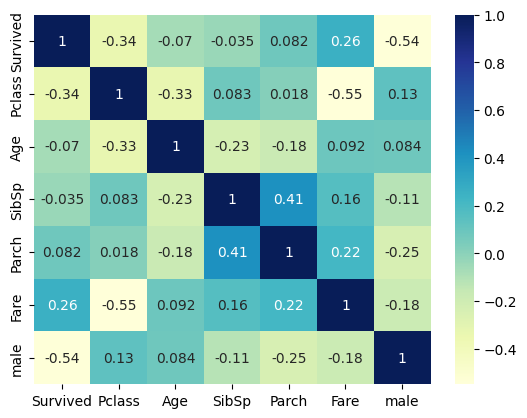

In [13]:
# Ver la correlacion de los datos
sns.heatmap(datos.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

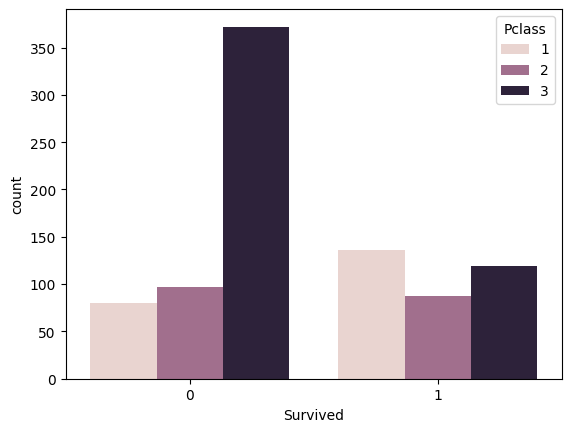

In [14]:
# Ver la correlacion de los datos
sns.countplot(x="Survived", data = datos, hue="Pclass")

In [15]:
# Comenzara entrenar el modelo
# Separar los datos del resultado
X = datos.drop(["Survived"], axis=1)
y = datos["Survived"]

In [16]:
from sklearn.model_selection import train_test_split

X_ent, X_pru, y_ent, y_pru = train_test_split(X,y, test_size=.2)

In [17]:
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_ent, y_ent)

LogisticRegression(max_iter=1000)

In [18]:
predicciones = modelo.predict(X_pru)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones)

0.7821229050279329

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       101
           1       0.81      0.65      0.72        78

    accuracy                           0.78       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179



In [21]:
pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,89,12
Real: Si,27,51


In [22]:
# Ver datos de X para inventar persona
X.head()

,Pclass,Age,SibSp,Parch,Fare,male
0,3,22.0,1,0,7.2500,True
1,1,38.0,1,0,71.2833,False
2,3,26.0,0,0,7.9250,False
3,1,35.0,1,0,53.1000,False
4,3,35.0,0,0,8.0500,True


In [42]:
# Inventar persona
Nueva_persona = [2,25,0,0,30.0000, False]
prediccion = modelo.predict([Nueva_persona])
if prediccion[0] == 1:
  print("Hubieras sobrevivido")
else:
  print("No hubieras sobrevivido")

Hubieras sobrevivido


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
